# Linear Regression
 1. Design model (input, output size, forward pass)
 2. Construct loss and optimizer
 3. Training loop
  - forward pass: compute prediction and loss
  - backward pass: gradients
  - update weights

In [11]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [12]:
# 0) setup data

X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [13]:
# 1) model

input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [14]:
# 2) loss and optimizer

learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [15]:
# 3) training loop

n_epochs = 100
for epoch in range(n_epochs):
  # forward pass and loss
  y_pred = model(X)
  loss = criterion(y_pred, y)

  #backward pass and update
  loss.backward()
  optimizer.step()

  #zero grad before new step
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4299.7881
epoch: 20, loss = 3207.5588
epoch: 30, loss = 2418.0168
epoch: 40, loss = 1846.6313
epoch: 50, loss = 1432.6887
epoch: 60, loss = 1132.5137
epoch: 70, loss = 914.6418
epoch: 80, loss = 756.3761
epoch: 90, loss = 641.3209
epoch: 100, loss = 557.6200


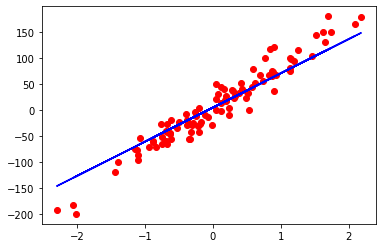

In [16]:
# 4) plot

predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()